# Titantic Dataset
**Author:** Brett Neely

**Date:** March 31, 2025  

**Introduction:** The purpose of this notebook is to use a model to predict the survival on the Titanic from various inpute features. There will be three classifications models employed in this notebook:
- Decision Tree Classifier
- Support Vector Machine
- Neural Network

In [33]:
# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

### Section 1: Import The Dataset and Inspect the Data

In [2]:
# Load the dataset from Seaborn
titanic = sns.load_dataset('titanic')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Section 2: Data Exploration and Preparation
#### 2.1 Handle Missing Values and Clean Data

In [3]:
# Impute missing values for age using the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [4]:
# Drop null values for fare
titanic = titanic.dropna(subset=['fare'])

In [6]:
# Create a feature for family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [9]:
# Convert sex to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

### Section 3: Feature Selection and Justification

In [ ]:
# Case 1: Age Only
X1 = titanic[['age']]
y1 = titanic['fare']

In [8]:
# Case 2: family_size only
X2 = titanic[['family_size']]
y2 = titanic['fare']

In [10]:
# Case 3: age and family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

In [11]:
# Case 4. 
X4 = titanic[['sex']]
y4 = titanic['fare']

#### Section 3 Reflection
##### Why might these features affect a passenger's fare?
We are trying to predict a passenger's fare. The feature age could help predict a passenger's fare because there may have been a different cost associated by age group. The feature family_size could help predict a passenger's fare because a family may have received a discounted fare (or an increased fare) for having multiple memebers in the party.
##### List all available features:
age, family_size, sex
##### Which other features could improve predictions and why? 
pclass and survived. I think survived could improve predictions for fare because those who did not survive probably had a lower fare and subsuquently class as well.
##### How many variables are in your Case 4? 
1
##### Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs?
I chose sex. I don't know if sex will be a good input for a predicting a passenger's fare. It may make sense that fare may have been different during this time period in history, but I could also see sex not being a good predictor.

### Section 4: Train a Regression Model (Linear Regression)

#### 4.1 Split the data

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

#### 4.2 Train and Evaluate Linear Regression Models for all four cases

In [13]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

In [14]:
# Train and test predictions
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

#### 4.3 Report Performance

In [17]:
# Case 1 Performance
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

Case 1: Training R²: 0.009950688019452203
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364


In [18]:
# Case 2 Performance
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", root_mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.025348159416414


In [19]:
# Case 3 Performance
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", root_mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688


In [20]:
# Case 4 Performance
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", root_mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 4: Training R²: 0.023885614755059348
Case 4: Test R²: 0.09936584220882572
Case 4: Test RMSE: 36.09746477477292
Case 4: Test MAE: 24.24249103567552


#### Section 4 Reflection

##### Did Case 1 overfit or underfit?
Underfit - a very low training R2 indicates the model barely explains any variance in the training data. This means that it is too simple to capture meaningful patterns. The test performance (R2) is also extremely poor as it is close to 0.

##### Did Case 2 overfit or underfit?
Underfit - a low training R2 indicates the model does not explain much of the variance in the training data and is not capturing underlying patterns well.

##### Did Case 3 overfit or underfit?
Underfit - a low training R2 indicates the model does not explain much of the variance in the training data and is not capturing underlying patterns well.

##### Did Case 4 overfit or underfit? 
Underfit - a low training R2 indicates the model does not explain much of the variance in the training data and is not capturing underlying patterns well.

##### Did adding age improve the model?
Yes, but only slightly.
##### Provide an explanation:
Adding age to family size did improve the model's training R2 but only slightly. The model is still underfit with age independently, family_size independently, and age + family size together.

##### Which case performed the worst?
Age independently performed the worst because of it's severly low training R2 and test R2. I do not think adding more training data would improve it. I conclude that this feature does not predict passenger fare well.

##### Which case performed the best?
Case 4 (sex) performed the best because it had the highest test R2 of 0.0994 which indicates the best ability to explain the variance in the test set. It also indicates the smallest average squared error in predictions. Adding more training data would probably improve the accuracy since this feature seems to be a good predictor of passenger fare.

### Section 5: Compare Alternative Models
#### 5.1 Evaluate Ridge Regression (L2 penalty) for the best case (Case 4)

In [21]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

#### 5.2 Evaluate Elastic Net (L1 + L2 combined) for the best case (Case 4)

In [22]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

#### 5.3 Evaluate Polynomial Regression for the best case (Case 4)

In [25]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)

#### 5.4 Visualize Polynomial Cubic Fit (for 1 inpute feature)

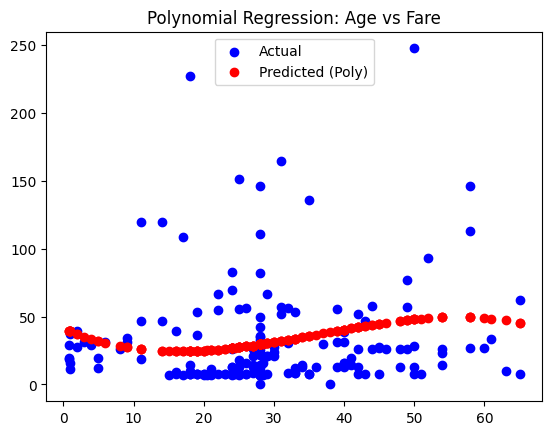

In [27]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

#### Section 5.4 Reflection
##### What patterns does the cubic model seem to capture?
Cubic model captures a constant regression and heavily excludes outliers.
##### Where does it perform well or poorly?
It performed well for the majority of data points to create a constant linear relationship between Age and Fare.
##### Did the polynomial fit outperform linear regression?
Polynomial fit did not outperform linear regression for Age vs. Fare.

#### Section 5.4 Compare All Models

In [ ]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y1_test, y_pred_test1)
report("Ridge", y1_test, y_pred_ridge)
report("ElasticNet", y1_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)

Linear R²: 0.003
Linear RMSE: 37.97
Linear MAE: 25.29

Ridge R²: 0.099
Ridge RMSE: 36.10
Ridge MAE: 24.24

ElasticNet R²: 0.068
ElasticNet RMSE: 36.71
ElasticNet MAE: 24.33

Polynomial R²: -0.003
Polynomial RMSE: 38.10
Polynomial MAE: 25.30



#### Section 5.6 Visualize Higher Order Polynomial (for the same 1 input case)

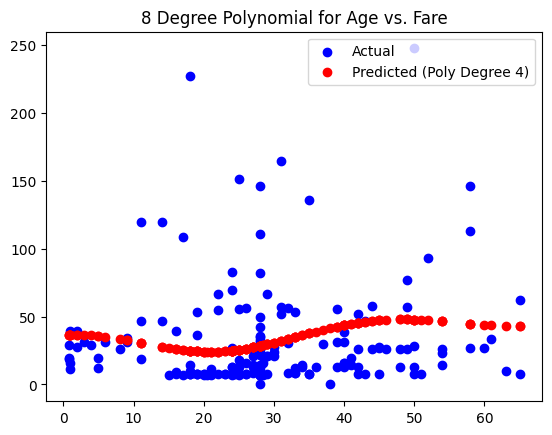

In [32]:
poly_8 = PolynomialFeatures(degree=8)
X_train_poly_8 = poly_8.fit_transform(X1_train)
X_test_poly_8 = poly_8.transform(X1_test)
poly_model_8 = LinearRegression()
poly_model_8.fit(X_train_poly_8, y1_train)
y_pred_poly_8 = poly_model_8.predict(X_test_poly_8)

plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly_8, color='red', label='Predicted (Poly Degree 4)')
plt.legend()
plt.title("8 Degree Polynomial for Age vs. Fare")
plt.show()

### Section 6 Final Thoughts
#### 6.1 Summarize Findings
The most useful features were sex, but not by much compared to age, family size, and age + family size as all features underfit the model.
The regresison model that performed the best was the Ridge Regression.
#### 6.2 Discuss Challenges
Fare was hard to predict, all input features in this analysis did not perform well in any model besides ridge regression.
I do not believe skew or outliers impacted the model as there were very few outliers.